##Introduction to Computer Vison with Tensorflow

Computer vison is the practise of writting algorithems which can see the data from camara

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Get the data
link:https://www.kaggle.com/dansbecker/food-101

In here only using pizza and steak (Binary Classification)

In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


--2021-07-15 05:15:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c00::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.50M   110MB/s    in 0.9s    

2021-07-15 05:15:17 (110 MB/s) - ‘pizza_steak.zip.1’ saved [109579078/109579078]



##Inspect the Data

A vey crutial step at the begining is the become one with the data.At the computer vision this means visual many data.

In [3]:
!ls pizza_steak

test  train


In [4]:
import os

#walk though the dir and list the number
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in ''{dirpath}.")

There are 2 directories and 1 images in ''pizza_steak.
There are 2 directories and 1 images in ''pizza_steak/train.
There are 0 directories and 750 images in ''pizza_steak/train/steak.
There are 0 directories and 750 images in ''pizza_steak/train/pizza.
There are 2 directories and 1 images in ''pizza_steak/test.
There are 0 directories and 250 images in ''pizza_steak/test/steak.
There are 0 directories and 250 images in ''pizza_steak/test/pizza.


In [5]:
#extra file in the dir is ".DS Store"
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Jul 15 04:19 .
drwxr-xr-x 1 root root 4096 Jul 15 05:15 ..
-rw-r--r-- 1 root root 6148 Jul 15 05:15 .DS_Store
drwxr-xr-x 4 root root 4096 Jul 15 04:19 test
drwxr-xr-x 4 root root 4096 Jul 15 04:19 train


In [6]:
#another way to find out how many images in the file
num_steak_images_train =len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

##Visualize the Data

In [7]:
#get the class names programatically
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))

#remove the ds store
class_names=class_names[1:]
print(class_names)

['pizza' 'steak']


In [8]:
#visulaize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  #setup the target directory 
  target_folder =target_dir+target_class

  #get the random image path
  random_image =random.sample(os.listdir(target_folder),1)

  #read the image and plot it using matplotlib
  img =mpimg.imread(target_folder + "/" +random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape : {img.shape}")

  return img
  

Image shape : (512, 512, 3)


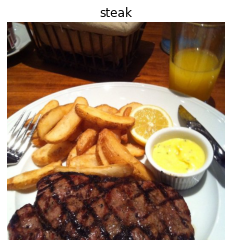

In [9]:
#view random image from training data set
img  =view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak"
)


In [10]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 28,  24,  15],
        [ 32,  28,  19],
        [ 37,  28,  21],
        ...,
        [ 49,  23,   8],
        [ 50,  24,   9],
        [ 52,  26,  11]],

       [[ 29,  25,  16],
        [ 37,  30,  22],
        [ 43,  34,  27],
        ...,
        [ 50,  27,  11],
        [ 50,  27,  11],
        [ 52,  26,  11]],

       [[ 28,  21,  13],
        [ 35,  26,  19],
        [ 42,  31,  25],
        ...,
        [ 52,  29,  13],
        [ 51,  28,  12],
        [ 48,  25,   9]],

       ...,

       [[230, 246, 235],
        [235, 247, 235],
        [229, 235, 225],
        ...,
        [225, 241, 241],
        [224, 240, 240],
        [224, 240, 240]],

       [[229, 247, 235],
        [232, 246, 233],
        [231, 237, 227],
        ...,
        [227, 243, 243],
        [227, 243, 243],
        [227, 243, 243]],

       [[234, 252, 240],
        [235, 249, 236],
        [235, 241, 231],
        ...,
        [226, 242, 24

In [11]:
#view the image shape 
img.shape

(512, 512, 3)

In [12]:
#get all the pixel values 0.1
img/255

array([[[0.10980392, 0.09411765, 0.05882353],
        [0.1254902 , 0.10980392, 0.0745098 ],
        [0.14509804, 0.10980392, 0.08235294],
        ...,
        [0.19215686, 0.09019608, 0.03137255],
        [0.19607843, 0.09411765, 0.03529412],
        [0.20392157, 0.10196078, 0.04313725]],

       [[0.11372549, 0.09803922, 0.0627451 ],
        [0.14509804, 0.11764706, 0.08627451],
        [0.16862745, 0.13333333, 0.10588235],
        ...,
        [0.19607843, 0.10588235, 0.04313725],
        [0.19607843, 0.10588235, 0.04313725],
        [0.20392157, 0.10196078, 0.04313725]],

       [[0.10980392, 0.08235294, 0.05098039],
        [0.1372549 , 0.10196078, 0.0745098 ],
        [0.16470588, 0.12156863, 0.09803922],
        ...,
        [0.20392157, 0.11372549, 0.05098039],
        [0.2       , 0.10980392, 0.04705882],
        [0.18823529, 0.09803922, 0.03529412]],

       ...,

       [[0.90196078, 0.96470588, 0.92156863],
        [0.92156863, 0.96862745, 0.92156863],
        [0.89803922, 0

##An end to end Example

build the convolutional neural network to find patterns in images ,more specifically way we need

*load our images

*preprocess our images

*build a CNN to find patternsin our image

*compile our CNN

*fit the CNN to training data

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#preprocess data(get all pixel values between 0 and 1)
train_datagen =ImageDataGenerator(rescale=1./255)
valid_datagen =ImageDataGenerator(rescale=1./255)

#setup paths to directories
train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"

#import data from directories anf turn into batches
train_data =train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

#build the CNN model
model_1 =tf.keras.Sequential([
                              tf.keras.layers.Conv2D(filters=10,
                                                     kernel_size=3,
                                                     activation="relu",
                                                     input_shape=(224,224,3)),
                              tf.keras.layers.Conv2D(10,3,activation="relu"),
                              tf.keras.layers.MaxPool2D(pool_size=2,
                                                        padding="valid"),
                              tf.keras.layers.Conv2D(10,3,activation="relu"),
                              tf.keras.layers.Conv2D(10,3,activation="relu"),
                              tf.keras.layers.MaxPool2D(2),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(1,activation="sigmoid")
])

#compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics =["accuracy"])

#fit the model
history_1 =model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 13s 201ms/step - loss: 0.6033 - accuracy: 0.6727 - val_loss: 0.4092 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4331 - accuracy: 0.8080 - val_loss: 0.3565 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 9s 201ms/step - loss: 0.3979 - accuracy: 0.8287 - val_loss: 0.3404 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 9s 201ms/step - loss: 0.3541 - accuracy: 0.8527 - val_loss: 0.3345 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3166 - accuracy: 0.8727 - val_loss: 0.3075 - val_accuracy: 0.8800


If above is taking longer make sure to change the hardware type to "GPU".

Then restart the envirnment

In [14]:
# Found 1500 images belonging to 2 classes.
# Found 500 images belonging to 2 classes.
# Epoch 1/5
# 47/47 [==============================] - ETA: 0s - loss: 0.5718 - accuracy: 0.6933

In [15]:
#model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

##Use the model as before

relicate the model pre built in classification



In [16]:
#set random seed
tf.random.set_seed(42)

#create a model to replicte playgroud model
model_2 =tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(224,224,3)),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(1,activation="sigmoid")
])

#compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))



Epoch 1/5
47/47 [==============================] - 9s 178ms/step - loss: 0.8041 - accuracy: 0.4947 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 171ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [17]:
#model summary
model_2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [18]:
#set random seed
tf.random.set_seed(42)

#create a model to replicte playgroud model
model_3 =tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(224,224,3)),
                              tf.keras.layers.Dense(100,activation="relu"),
                              tf.keras.layers.Dense(100,activation="relu"),
                              tf.keras.layers.Dense(100,activation="relu"),
                              tf.keras.layers.Dense(1,activation="sigmoid")
])

#compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_3=model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))





Epoch 1/5
47/47 [==============================] - 9s 190ms/step - loss: 2.9528 - accuracy: 0.6120 - val_loss: 0.9222 - val_accuracy: 0.5760
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 1.0405 - accuracy: 0.6747 - val_loss: 0.4862 - val_accuracy: 0.7820
Epoch 3/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6649 - accuracy: 0.7453 - val_loss: 1.3824 - val_accuracy: 0.5880
Epoch 4/5
47/47 [==============================] - 8s 173ms/step - loss: 0.9848 - accuracy: 0.7067 - val_loss: 0.5255 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 8s 170ms/step - loss: 0.5280 - accuracy: 0.7720 - val_loss: 0.5153 - val_accuracy: 0.7540


In [19]:
#model 3 summary
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


##Binary Clssification

1.become one with the dataset

2.preproess the data

3.create the model

4.fit the model

5.evaluate the model

6.adjust different parameters and improve the model

7.repeat until satisfied

##Visualzie the data

Image shape : (512, 384, 3)
Image shape : (512, 512, 3)


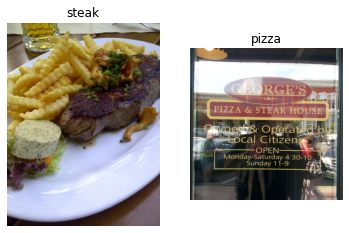

In [20]:
plt.figure()
plt.subplot(1,2,1)
steak_img =view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

##Preprocess data


In [21]:
#define the directory
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

In [22]:
#create train and test data generator and rescale data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [23]:
#loading the image data from directory
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),
                                           class_mode="binary",
                                           batch_size=32)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [24]:
#get a sample of training data batch
images,labels=train_data.next()
len(images),len(labels)


(32, 32)

In [25]:
#get the first two images
images[:2],images[0].shape


(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [26]:
#view the first batch labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

##Create the CNN Model



In [27]:
#make the creating a model easier 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

#craete the model
model_4=Sequential([
                     Conv2D(filters=10,#numbers od sliding windows
                            kernel_size=3,#the size of the slidng window
                            strides=1,#the size of the step slidng window take in image
                            padding="valid",#use "same" if output shape same as input shape ,input and output shapes are different then use "valid"
                            activation="relu",
                            input_shape=(224,224,3)),
                     Conv2D(10,3,activation="relu"),
                     Conv2D(10,3,activation="relu"),
                     Flatten(),
                     Dense(1,activation="sigmoid")

])

In [28]:
#compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [29]:
#get the summary
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [30]:
2180*218

475240

In [31]:
#fit the model
history_4 =model_4.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 194ms/step - loss: 1.0313 - accuracy: 0.6780 - val_loss: 0.4965 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4673 - accuracy: 0.7953 - val_loss: 0.4007 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3500 - accuracy: 0.8593 - val_loss: 0.3893 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 9s 198ms/step - loss: 0.1852 - accuracy: 0.9400 - val_loss: 0.4226 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.0758 - accuracy: 0.9793 - val_loss: 0.5458 - val_accuracy: 0.7960


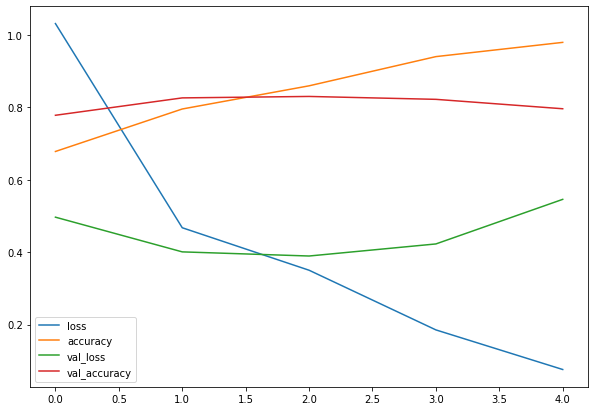

In [32]:
##Evaluate the model
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [33]:
#plot the validation and training curve
def plot_loss_curve(history):
  """
  Returns separte loss curve for trainnnig and validation mtrics
  """

  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs=range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  #plot Accuracy
  plt.figure()
  plt.plot(epochs,loss,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()


when model validation starts to increase it likly model try to overfitting to the training data set.

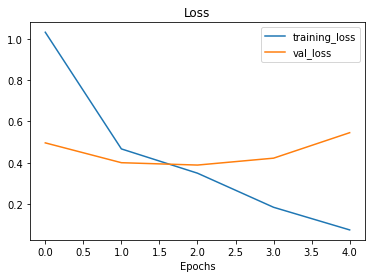

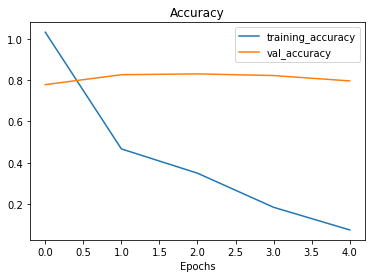

In [34]:
#check out the loss and accuracy for model
plot_loss_curve(history_4)

##Adjust model parameters

1.create a baseline 

2.beat the baseline by overfitting a larger model

3.reduce the overfitting

*ways to reduce the overfitting

1.incease the number of conv layers

2.increase the number of filters

3.add another dense layeers to the output of flattned ayer

*reduce overfitting:

1.add data augmentation

2.add regilization layers

3.add more data

In [35]:
#crate the model
model_5 =Sequential([
                     Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                     MaxPool2D(pool_size=2),
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Flatten(),
                     Dense(1,activation="sigmoid")
])



In [36]:
#compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [37]:
#fit the model
history_5 =model_5.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 184ms/step - loss: 0.5928 - accuracy: 0.6773 - val_loss: 0.4931 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 8s 179ms/step - loss: 0.4588 - accuracy: 0.7867 - val_loss: 0.4014 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 8s 179ms/step - loss: 0.4427 - accuracy: 0.8020 - val_loss: 0.3688 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4164 - accuracy: 0.8187 - val_loss: 0.3618 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3670 - accuracy: 0.8460 - val_loss: 0.3988 - val_accuracy: 0.8200


In [38]:
#get the summary
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

In [39]:
model_4.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


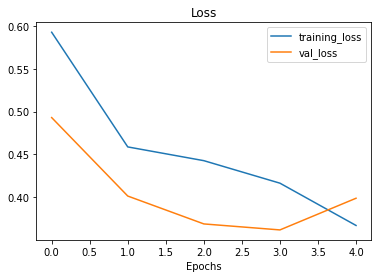

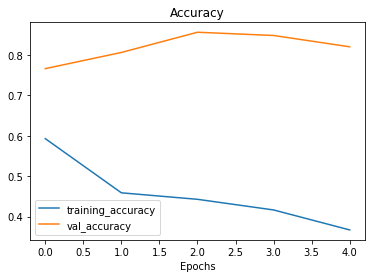

In [40]:
plot_loss_curve(history_5)

##Data Augmentation

Data Augmentaion add only to train data.

Data saved same in the directory while chnaged while loading

In [41]:
#create ImageDataGenertor traninig with data augmentation
train_datagen_augmented =ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            horizontal_flip=True)

#Create Image data gen without data generator
train_datagen =ImageDataGenerator(rescale=1/255.)

#Create Image data gen without data generator
test_datagen =ImageDataGenerator(rescale=1/255.)



In [42]:
#import data aygmented it from training directory
print("Augmented training data")

train_datagen_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode="binary",
                                                                    shuffle =False)

#create non augmented train data
print("Non -Augmented Training Data")
train_data=train_datagen.flow_from_directory(train_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="binary",
                                            shuffle =False)
IMG_SIZE=(224,224)

#craete testdata batches
print("Non-augmented test data")
test_data=test_datagen.flow_from_directory(test_dir,
                                            target_size=IMG_SIZE,
                                            batch_size=32,
                                            class_mode="binary",
                                            shuffle =False)


Augmented training data
Found 1500 images belonging to 2 classes.
Non -Augmented Training Data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


In [43]:
#get some sample augmented data
images,labels =train_data.next()
augmented_images,augmented_labels =train_datagen_augmented.next()

In [44]:
augmented_images

array([[[[0.13333334, 0.14509805, 0.07058824],
         [0.13333334, 0.14509805, 0.07058824],
         [0.13333334, 0.14509805, 0.07058824],
         ...,
         [0.11156213, 0.10764056, 0.08803272],
         [0.11527313, 0.11135156, 0.09174372],
         [0.11522034, 0.11129876, 0.09169092]],

        [[0.13333334, 0.14509805, 0.07058824],
         [0.13333334, 0.14509805, 0.07058824],
         [0.13333334, 0.14509805, 0.07058824],
         ...,
         [0.11156249, 0.10764092, 0.08803307],
         [0.11527277, 0.1113512 , 0.09174336],
         [0.11522052, 0.11129895, 0.0916911 ]],

        [[0.13333334, 0.14509805, 0.07058824],
         [0.13333334, 0.14509805, 0.07058824],
         [0.13333334, 0.14509805, 0.07058824],
         ...,
         [0.11156286, 0.10764129, 0.08803345],
         [0.11527241, 0.11135084, 0.09174299],
         [0.1152207 , 0.11129913, 0.09169128]],

        ...,

        [[0.44047332, 0.4631147 , 0.34395087],
         [0.44052306, 0.46318105, 0.34400892]

(-0.5, 223.5, 223.5, -0.5)

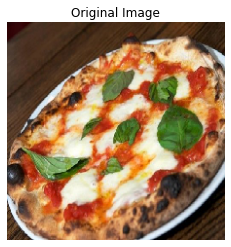

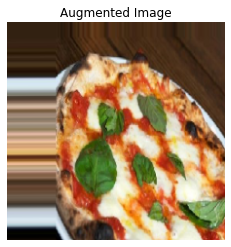

In [45]:
#show the original image 
import random
random_number =random.randint(0,32)
plt.imshow(images[random_number])
plt.title(f'Original Image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

In [46]:
#crate the model
model_6 =Sequential([
                     Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                     MaxPool2D(pool_size=2),
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Flatten(),
                     Dense(1,activation="sigmoid")
])

#compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


#fit the model
history_6 =model_6.fit(train_datagen_augmented,
                       epochs=5,
                       steps_per_epoch=len(train_datagen_augmented),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 467ms/step - loss: 0.7115 - accuracy: 0.4973 - val_loss: 0.6849 - val_accuracy: 0.6900
Epoch 2/5
47/47 [==============================] - 21s 454ms/step - loss: 0.6881 - accuracy: 0.5707 - val_loss: 0.6690 - val_accuracy: 0.6620
Epoch 3/5
47/47 [==============================] - 23s 481ms/step - loss: 0.6891 - accuracy: 0.5447 - val_loss: 0.6441 - val_accuracy: 0.7660
Epoch 4/5
47/47 [==============================] - 22s 473ms/step - loss: 0.6294 - accuracy: 0.7007 - val_loss: 0.5473 - val_accuracy: 0.7260
Epoch 5/5
47/47 [==============================] - 21s 455ms/step - loss: 0.5725 - accuracy: 0.7107 - val_loss: 1.5829 - val_accuracy: 0.5180


In [47]:
#evaluate
model_6.evaluate(test_data)

16/16 [==============================] - 2s 130ms/step - loss: 1.5829 - accuracy: 0.5180


[1.5829023122787476, 0.5180000066757202]

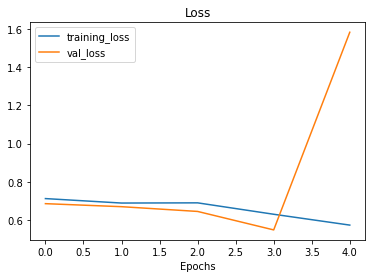

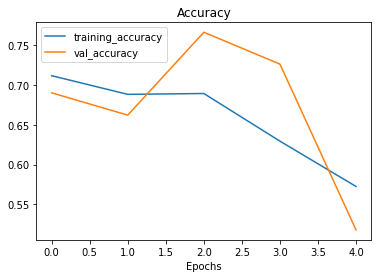

In [48]:
#check model training curve
plot_loss_curve(history_6)

##Shuffle Augmented Training Data

In [49]:
#create ImageDataGenertor traninig with data augmentation
train_datagen_augmented =ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            horizontal_flip=True)

#Create Image data gen without data generator
train_datagen =ImageDataGenerator(rescale=1/255.)

#Create Image data gen without data generator
test_datagen =ImageDataGenerator(rescale=1/255.)

#import data aygmented it from training directory
print("Augmented training data")

train_datagen_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode="binary",
                                                                    shuffle =True)

#create non augmented train data
print("Non -Augmented Training Data")
train_data=train_datagen.flow_from_directory(train_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="binary",
                                            shuffle =True)
IMG_SIZE=(224,224)

#craete testdata batches
print("Non-augmented test data")
test_data=test_datagen.flow_from_directory(test_dir,
                                            target_size=IMG_SIZE,
                                            batch_size=32,
                                            class_mode="binary",
                                            shuffle =True)

#get some sample augmented data
images,labels =train_data.next()
augmented_images,augmented_labels =train_datagen_augmented.next()

Augmented training data
Found 1500 images belonging to 2 classes.
Non -Augmented Training Data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


In [50]:
#crate the model
model_7 =Sequential([
                     Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                     MaxPool2D(pool_size=2),
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Flatten(),
                     Dense(1,activation="sigmoid")
])

#compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


#fit the model
history_7 =model_7.fit(train_datagen_augmented,
                       epochs=3,
                       steps_per_epoch=len(train_datagen_augmented),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/3
47/47 [==============================] - 22s 468ms/step - loss: 0.6212 - accuracy: 0.6427 - val_loss: 0.4163 - val_accuracy: 0.8380
Epoch 2/3
47/47 [==============================] - 22s 478ms/step - loss: 0.5197 - accuracy: 0.7413 - val_loss: 0.3970 - val_accuracy: 0.8300
Epoch 3/3
47/47 [==============================] - 21s 454ms/step - loss: 0.4808 - accuracy: 0.7827 - val_loss: 0.4808 - val_accuracy: 0.7660


In [51]:
#evaluate
model_7.evaluate(test_data)

16/16 [==============================] - 2s 129ms/step - loss: 0.4808 - accuracy: 0.7660


[0.48084935545921326, 0.765999972820282]

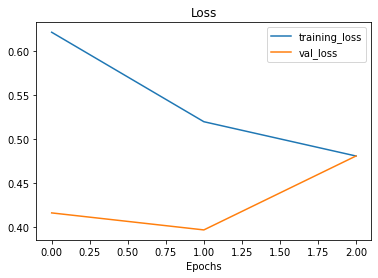

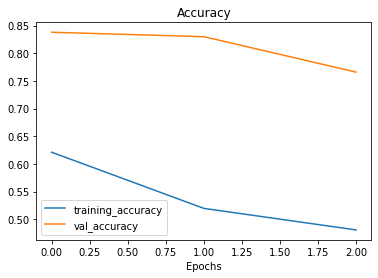

In [52]:
#check model training curve
plot_loss_curve(history_7)

##Repeat Until Satisfied

Few things to try to improve the model

1.incease the number of model layers

2.increase the number of filters in layers

3.train for longer

4.find the ideal learning rate

5.get more data

6.use another model -transfer learning






In [53]:
#crate the model
model_8 =Sequential([
                     Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(pool_size=2),
                     Conv2D(10,3,activation="relu"),
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Flatten(),
                     Dense(1,activation="sigmoid")
])

#compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


#fit the model
history_8 =model_7.fit(train_datagen_augmented,
                       epochs=5,
                       steps_per_epoch=len(train_datagen_augmented),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 469ms/step - loss: 0.4794 - accuracy: 0.7733 - val_loss: 0.3464 - val_accuracy: 0.8580
Epoch 2/5
47/47 [==============================] - 22s 466ms/step - loss: 0.4522 - accuracy: 0.8000 - val_loss: 0.3284 - val_accuracy: 0.8680
Epoch 3/5
47/47 [==============================] - 21s 449ms/step - loss: 0.4465 - accuracy: 0.8007 - val_loss: 0.4797 - val_accuracy: 0.7720
Epoch 4/5
47/47 [==============================] - 22s 461ms/step - loss: 0.4333 - accuracy: 0.8093 - val_loss: 0.3126 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 22s 474ms/step - loss: 0.4318 - accuracy: 0.8087 - val_loss: 0.3413 - val_accuracy: 0.8660


##Making a prediction with trained model on custom data

In [54]:
pip install matplotlib


In [55]:
!pip install image 



In [56]:
#view the example image

import matplotlib.image as mpimg
import matplotlib.pyplot as plt


!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg 


--2021-07-15 05:24:55--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1         [ <=>                ] 115.54K  --.-KB/s    in 0.02s   

2021-07-15 05:24:55 (5.60 MB/s) - ‘03-steak.jpeg.1’ saved [118308]



(-0.5, 3023.5, 4031.5, -0.5)

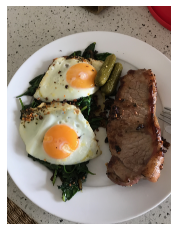

In [57]:
steak =mpimg.imread("/content/drive/MyDrive/Dog Vision/03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [58]:
#shape of the iamge
steak.shape

(4032, 3024, 3)

In [59]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

In [60]:
#create a fucntion to import image to resize it able to work with model
def load_prep_image(filename,img_shape=224):
  """
  Reads thhe image and reshape into tensor and reshape
  """
  #read in the image
  img =tf.io.read_file(filename)

  #decode the read file into tensor
  img =tf.image.decode_image(img)

  #resize the image
  img =tf.image.resize(img,size=[img_shape,img_shape])

  #rescale the image between to  and 1 
  img =img/255

  return img

In [61]:
#load and preprocess our custom image
steak =load_prep_image("/content/drive/MyDrive/Dog Vision/03-steak.jpeg")
steak


<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [62]:
#make a prediction
model_8.predict(tf.expand_dims(steak,axis=0))

array([[0.50043577]], dtype=float32)

In [63]:
#make a prediction
pred =model_7.predict(tf.expand_dims(steak,axis=0))

In [64]:
class_names

array(['pizza', 'steak'], dtype='<U9')

In [65]:
#index the class by rounding the prediction probalities
pred_class =class_names[int(tf.round(pred))]
pred_class

'steak'

In [66]:
def pred_and_plot(model,filename,class_names=class_names):
  """
  Imports image and make predciton with model and plots the image with the predicted label
  """

  #import the target image and prepared
  img =load_prep_image(filename)

  #make prediction
  pred =model.predict(tf.expand_dims(img,axis=0))

  #get the precited class

  pred_class =class_names[int(tf.round(pred))]

  #plot the image and class predicted
  plt.imshow(img)
  plt.title(f"Prediction :{pred_class}")
  plt.axis(False)



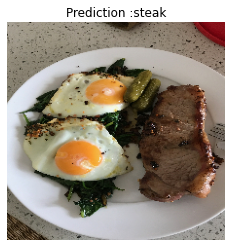

In [67]:
#test the model on custom image
pred_and_plot(model_7,"/content/drive/MyDrive/Dog Vision/03-steak.jpeg")

##Multiclass Classification

1.   Become one with data
2.   preprocess data
3.   Crraete the model
4.   Fit the model
5.   Evaluate the model
6.   Adjust hyper parameters
7.   Repeat until satisfied



In [68]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#unzip data
zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2021-07-15 05:24:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.128, 173.194.203.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   236MB/s    in 2.1s    

2021-07-15 05:25:00 (236 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [69]:
import os 

#walk though  food images
for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.

In [70]:
!ls -la 10_food_classes_all_data


total 16
drwxr-xr-x  4 root root 4096 Jul 15 04:32 .
drwxr-xr-x  1 root root 4096 Jul 15 05:24 ..
drwxr-xr-x 12 root root 4096 Jul 15 04:32 test
drwxr-xr-x 12 root root 4096 Jul 15 04:32 train


In [71]:
#setup the train and test directories
train_dir ="10_food_classes_all_data/train/"
test_dir ="10_food_classes_all_data/test/"

In [72]:
#get the classnames
import pathlib
import numpy as np

data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape : (341, 512, 3)


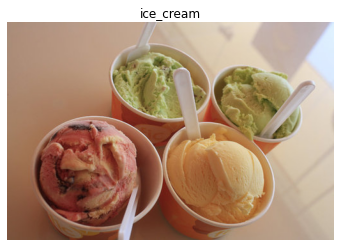

In [73]:
#visualize the data
import random
img=view_random_image(target_dir=train_dir,
                      target_class=random.choice(class_names))

##Preprocess data for multiclass

In [85]:
#setup the train and test directories
train_dir ="10_food_classes_all_data/train/"
test_dir ="10_food_classes_all_data/test/"

In [86]:
#create train and test data generator and rescale data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [76]:
# #get a sample of training data batch
# images,labels=train_data.next()
# len(images),len(labels)

(32, 32)

In [87]:
#loading the image data from directory
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             class_mode="categorical",
                                             batch_size=32)

test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),
                                           class_mode="categorical",
                                           batch_size=32)


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [88]:
#get the first two images
images[:2],images[0].shape


(array([[[[0.427451  , 0.4039216 , 0.30980393],
          [0.43529415, 0.4156863 , 0.3372549 ],
          [0.44705886, 0.43137258, 0.38431376],
          ...,
          [0.08235294, 0.05490196, 0.08627451],
          [0.07058824, 0.04705883, 0.08627451],
          [0.06666667, 0.0509804 , 0.10588236]],
 
         [[0.43921572, 0.4156863 , 0.2901961 ],
          [0.43921572, 0.4156863 , 0.3137255 ],
          [0.44705886, 0.427451  , 0.34901962],
          ...,
          [0.07058824, 0.04313726, 0.07058824],
          [0.0627451 , 0.03921569, 0.07843138],
          [0.0627451 , 0.04705883, 0.10196079]],
 
         [[0.46274513, 0.43529415, 0.22352943],
          [0.44705886, 0.42352945, 0.23529413],
          [0.43921572, 0.427451  , 0.25882354],
          ...,
          [0.05490196, 0.04705883, 0.05882353],
          [0.05490196, 0.04313726, 0.07058824],
          [0.06666667, 0.0627451 , 0.09411766]],
 
         ...,
 
         [[0.5647059 , 0.53333336, 0.3529412 ],
          [0.55686

In [89]:
#view the first batch labels
labels

array([1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0.],
      dtype=float32)

##Create the model

In [96]:
#crate the model
model_9 =Sequential([
                     Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(pool_size=2),
                     Conv2D(10,3,activation="relu"),
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Flatten(),
                     Dense(10,activation="softmax")
])

#compile the model
model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


#fit the model
history_9 =model_9.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 47s 197ms/step - loss: 2.1687 - accuracy: 0.2135 - val_loss: 2.0197 - val_accuracy: 0.2796
Epoch 2/5
235/235 [==============================] - 44s 188ms/step - loss: 1.9610 - accuracy: 0.3129 - val_loss: 2.0557 - val_accuracy: 0.2912
Epoch 3/5
235/235 [==============================] - 46s 195ms/step - loss: 1.7430 - accuracy: 0.3976 - val_loss: 1.9428 - val_accuracy: 0.3100
Epoch 4/5
235/235 [==============================] - 45s 193ms/step - loss: 1.3193 - accuracy: 0.5609 - val_loss: 2.2195 - val_accuracy: 0.3124
Epoch 5/5
235/235 [==============================] - 45s 192ms/step - loss: 0.7177 - accuracy: 0.7721 - val_loss: 2.8675 - val_accuracy: 0.2748


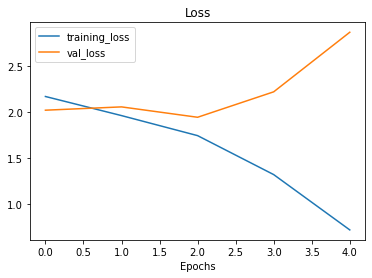

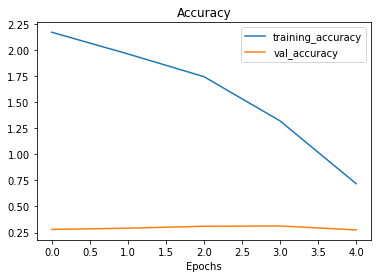

In [97]:
#check the loss curvers
plot_loss_curve(history_9)

In [98]:
test_dir

'10_food_classes_all_data/test/'

In [99]:
img



array([[[169, 140, 122],
        [169, 140, 122],
        [169, 140, 122],
        ...,
        [210, 227, 255],
        [213, 233, 255],
        [215, 235, 255]],

       [[169, 140, 122],
        [169, 140, 122],
        [169, 140, 122],
        ...,
        [212, 229, 255],
        [214, 234, 255],
        [216, 237, 255]],

       [[169, 140, 122],
        [169, 140, 122],
        [169, 140, 122],
        ...,
        [214, 232, 255],
        [216, 237, 255],
        [217, 239, 253]],

       ...,

       [[124,  83,  63],
        [124,  83,  63],
        [124,  83,  61],
        ...,
        [196, 183, 164],
        [196, 185, 163],
        [196, 185, 163]],

       [[122,  84,  63],
        [122,  84,  63],
        [122,  84,  61],
        ...,
        [196, 183, 164],
        [195, 184, 162],
        [196, 185, 163]],

       [[122,  84,  63],
        [122,  84,  63],
        [122,  84,  61],
        ...,
        [195, 182, 163],
        [195, 184, 162],
        [195, 184, 162]]

##Adjust the Hyper Parameters

In [100]:
#simplyfy the model
model_9.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 28090)           

In [101]:
model_10 = Sequential([
                     Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                     MaxPool2D(pool_size=2),
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Flatten(),
                     Dense(10,activation="softmax")
])

model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])


In [102]:
model_10.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 29160)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
_______________________________________________

In [95]:
#fit the model
history_10 =model_10.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 43s 181ms/step - loss: 2.1642 - accuracy: 0.2384 - val_loss: 2.0008 - val_accuracy: 0.2988
Epoch 2/5
235/235 [==============================] - 44s 187ms/step - loss: 1.8288 - accuracy: 0.3752 - val_loss: 1.8884 - val_accuracy: 0.3492
Epoch 3/5
235/235 [==============================] - 43s 183ms/step - loss: 1.4982 - accuracy: 0.5013 - val_loss: 1.9741 - val_accuracy: 0.3264
Epoch 4/5
235/235 [==============================] - 43s 184ms/step - loss: 0.9778 - accuracy: 0.6973 - val_loss: 2.2309 - val_accuracy: 0.3000
Epoch 5/5
235/235 [==============================] - 42s 180ms/step - loss: 0.5432 - accuracy: 0.8441 - val_loss: 2.6176 - val_accuracy: 0.2976


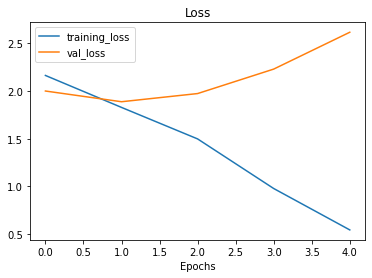

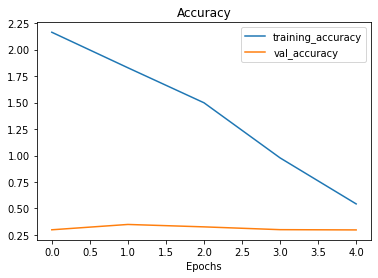

In [103]:
#plot loss curves
plot_loss_curve(history_10)

##Data Augmentation with Multiclass Model

In [117]:
#create ImageDataGenertor traninig with data augmentation
train_datagen_augmented =ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            horizontal_flip=True)

#Create Image data gen without data generator
train_datagen =ImageDataGenerator(rescale=1/255.)

#Create Image data gen without data generator
test_datagen =ImageDataGenerator(rescale=1/255.)

In [118]:
#import data aygmented it from training directory
print("Augmented training data")

train_datagen_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode="categorical",
                                                                    shuffle =True)

#create non augmented train data
print("Non -Augmented Training Data")
train_data=train_datagen.flow_from_directory(train_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="categorical",
                                            shuffle =True)
IMG_SIZE=(224,224)

#craete testdata batches
print("Non-augmented test data")
test_data=test_datagen.flow_from_directory(test_dir,
                                            target_size=IMG_SIZE,
                                            batch_size=32,
                                            class_mode="categorical",
                                            shuffle =True)

Augmented training data
Found 7500 images belonging to 10 classes.
Non -Augmented Training Data
Found 7500 images belonging to 10 classes.
Non-augmented test data
Found 2500 images belonging to 10 classes.


In [119]:
#get some sample augmented data
images,labels =train_data.next()
augmented_images,augmented_labels =train_datagen_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

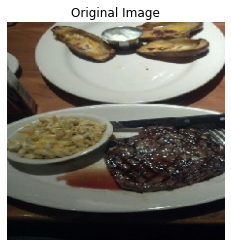

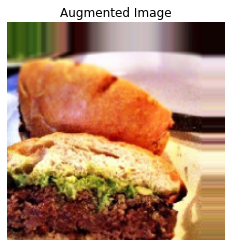

In [120]:
#show the original image 
import random
random_number =random.randint(0,32)
plt.imshow(images[random_number])
plt.title(f'Original Image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

In [121]:
model_11 = Sequential([
                     Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                     MaxPool2D(pool_size=2),
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Flatten(),
                     Dense(10,activation="softmax")
])

model_11.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [122]:
#fit the model
history_11 =model_11.fit(train_datagen_augmented,
                       epochs=5,
                       steps_per_epoch=len(train_datagen_augmented),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 110s 467ms/step - loss: 2.1989 - accuracy: 0.2041 - val_loss: 2.0161 - val_accuracy: 0.2808
Epoch 2/5
235/235 [==============================] - 108s 460ms/step - loss: 2.0555 - accuracy: 0.2739 - val_loss: 1.9686 - val_accuracy: 0.3108
Epoch 3/5
235/235 [==============================] - 108s 461ms/step - loss: 2.0227 - accuracy: 0.2939 - val_loss: 1.9298 - val_accuracy: 0.3232
Epoch 4/5
235/235 [==============================] - 107s 455ms/step - loss: 1.9977 - accuracy: 0.2997 - val_loss: 1.8792 - val_accuracy: 0.3424
Epoch 5/5
235/235 [==============================] - 109s 464ms/step - loss: 1.9620 - accuracy: 0.3273 - val_loss: 1.8528 - val_accuracy: 0.3624


In [123]:
model_10.evaluate(test_data)


79/79 [==============================] - 10s 131ms/step - loss: 2.1701 - accuracy: 0.1972


[2.1701459884643555, 0.1972000002861023]

In [124]:
model_11.evaluate(test_data)

79/79 [==============================] - 10s 131ms/step - loss: 1.8528 - accuracy: 0.3624


[1.8527789115905762, 0.36239999532699585]

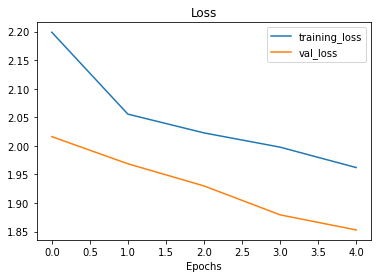

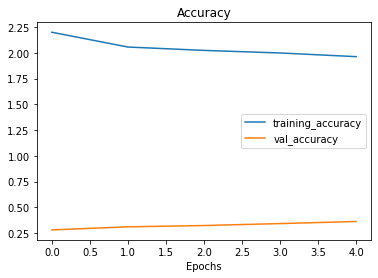

In [125]:
plot_loss_curve(history_11)

##Improve the model & make predictions

1.bring out the loss curve together

   * restucture the model architechture-no of layers,leraning rate,different data augmentation
   *run for more epochs
   *Try transfer learning

In [127]:
#make predicction 
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [136]:
#reconfig to work with multiclass images
def pred_and_plot(model,filename,class_names=class_names):
  """
  Imports image and make predciton with model and plots the image with the predicted label
  """

  #import the target image and prepared
  img =load_prep_image(filename)

  #make prediction
  pred =model.predict(tf.expand_dims(img,axis=0))

  #add logic for multiclass
  if(len(pred[0]))>1:
    pred_class=class_names[tf.argmax(pred[0])]

  else:
      pred_class =class_names[int(tf.round(pred[0]))]


  #plot the image and class predicted
  plt.imshow(img)
  plt.title(f"Prediction :{pred_class}")
  plt.axis(False)

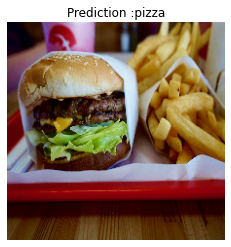

In [135]:
pred_and_plot(model=model_11,filename="/content/drive/MyDrive/Dog Vision/03-hamburger.jpeg",class_names=class_names)

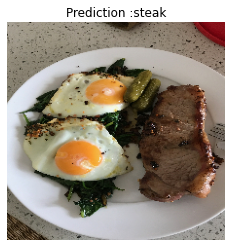

In [137]:
pred_and_plot(model=model_11,filename="/content/drive/MyDrive/Dog Vision/03-steak.jpeg",class_names=class_names)

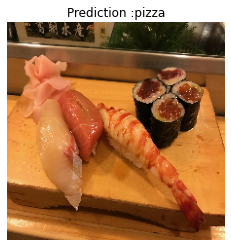

In [138]:
pred_and_plot(model=model_11,filename="/content/drive/MyDrive/Dog Vision/03-sushi.jpeg",class_names=class_names)

##Save and Load Model

In [139]:
#save model
model_11.save("Save tarined Model_11")

INFO:tensorflow:Assets written to: Save tarined Model_11/assets


In [140]:
#Load the Model
loaded_model_11=tf.keras.models.load_model("Save tarined Model_11")

In [141]:
model_11.evaluate(test_data)

79/79 [==============================] - 10s 131ms/step - loss: 1.8528 - accuracy: 0.3624


[1.8527789115905762, 0.36239999532699585]

In [142]:
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 11s 136ms/step - loss: 1.8528 - accuracy: 0.3624


[1.8527791500091553, 0.36239999532699585]